In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Making Summary Images of Calcium Imaging Data and Basic Image Processing

## Play around with image processing

## Maximum Projection and Other Summary Images

Learning outcomes

1. Maximum Intensity Projection (MIP): Highlights the most active regions by taking the maximum intensity across time, useful for spotting highly active cells.
2. Correlation Projection: Identifies regions with similar activity patterns by comparing temporal correlation between neighboring pixels.
3. Mean Projection: Averages intensities over time, offering an overview of consistent activity and signal distribution.
4. Standard Deviation Projection: Shows variability in intensity, highlighting areas of fluctuating activity to detect active neurons.
5. Cumulative or Sum Projection: Sums intensity values over time, providing a view of total activity, useful for assessing overall signal strength.

In [13]:
# Fake data

# Initialize parameters
n_frames = 10
array_size = (9, 9)
moving_pixels_size = (3, 3)
frames = []

# Generate frames
for frame_number in range(n_frames):
    # Create a blank frame
    frame = np.zeros(array_size)
    
    # Calculate the top-left corner of the moving pixels for this frame
    # Let's move the block diagonally across the frames
    row_start = frame_number % (array_size[0] - moving_pixels_size[0] + 1)
    col_start = frame_number % (array_size[1] - moving_pixels_size[1] + 1)
    
    # Assign varying intensities to the moving group of pixels
    for i in range(moving_pixels_size[0]):
        for j in range(moving_pixels_size[1]):
            frame[row_start + i, col_start + j] = (i + j + frame_number) * 10  # Example intensity pattern
    
    frames.append(frame)

# Convert list of frames to a numpy array for easier handling
frames_array = np.array(frames)

In [18]:
# second fake data (if interested)

np.random.seed(0)  # For reproducible results
time_points, height, width = 10, 100, 100
image_stack = np.random.rand(time_points, height, width) * 100

# Adding some "activity" to simulate calcium signals in certain regions
image_stack[:, 20:40, 40:60] += np.linspace(0, 50, time_points)[:, None, None]

frames_array = image_stack.copy()

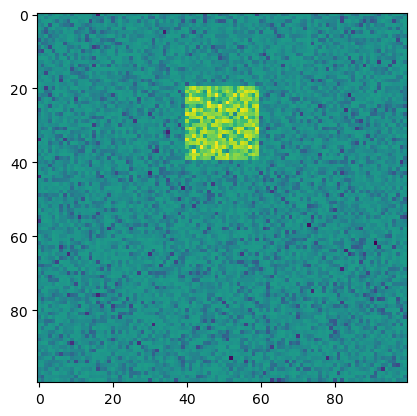

In [19]:
# Maximum projection

max_proj = np.max(frames_array, axis=0)
plt.imshow(max_proj)

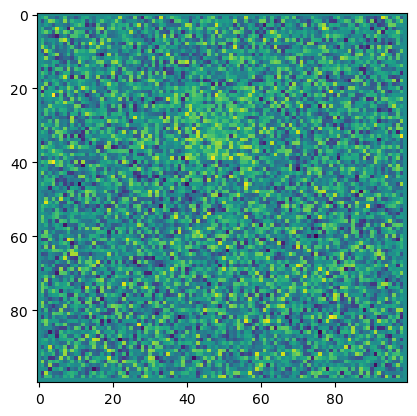

In [20]:
# correlation image

image_stack = frames_array.copy()
time, height, width = image_stack.shape
correlation_image = np.zeros((height, width))
means = np.mean(image_stack, axis=0)
std_devs = np.std(image_stack, axis=0)

# Avoid division by zero in correlation calculation
std_devs[std_devs == 0] = 1e-10

# Calculate the correlation for each pixel with its vertical and horizontal neighbors
for i in range(1, height-1):
    for j in range(1, width-1):
        # For simplicity, consider the correlation with the pixel to the right
        numerator = np.mean((image_stack[:, i, j] - means[i, j]) * (image_stack[:, i, j+1] - means[i, j+1]), axis=0)
        denominator = std_devs[i, j] * std_devs[i, j+1]
        correlation = numerator / denominator
        correlation_image[i, j] = correlation

plt.imshow(correlation_image)

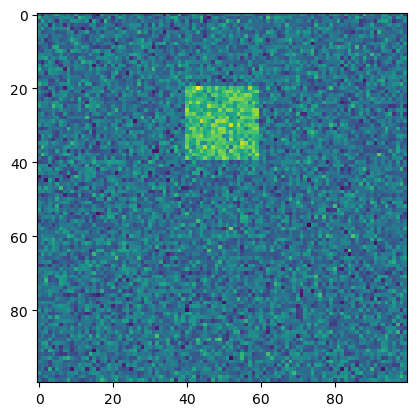

In [21]:
# mean projection

mean_proj = np.mean(frames_array, axis=0)
plt.imshow(mean_proj)

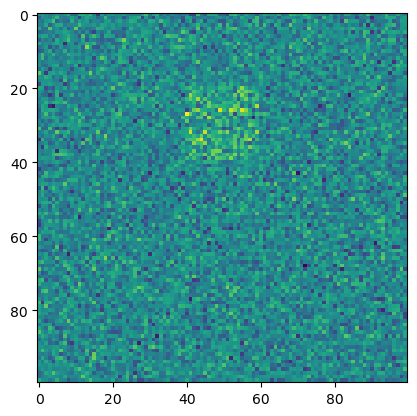

In [22]:
# standard deviation projection

std_proj = np.std(frames_array, axis=0)
plt.imshow(std_proj)

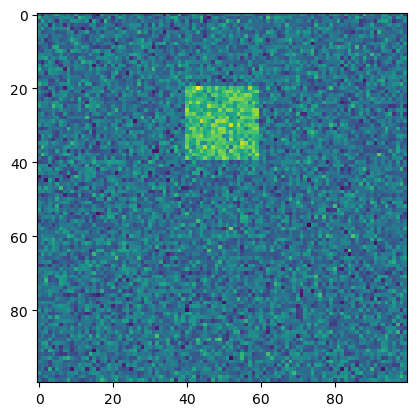

In [23]:
# sum projection

sum_proj = np.sum(frames_array, axis=0)
plt.imshow(sum_proj)

## High Pass Spatial Filtering with OpenCV

Learning Outcomes:

1. Concept of low pass filtering
2. Concept of high pass filtering
3. How to do it with OpenCV

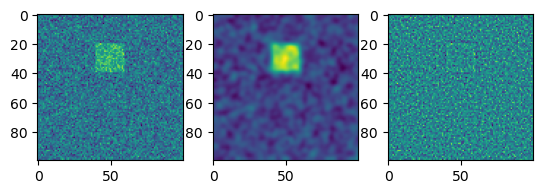

In [28]:
low_pass = cv2.GaussianBlur(np.median(frames_array, axis=0), (9, 9), 0)
high_pass = cv2.subtract(np.median(frames_array, axis=0), low_pass)


plt.subplot(1,3,1)
plt.imshow(np.median(frames_array, axis=0))

plt.subplot(1,3,2)
plt.imshow(low_pass)

plt.subplot(1,3,3)
plt.imshow(high_pass)


## CaImAn Movie Handling Tool